In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'


start = datetime.date(2017, 1 ,1)
end = datetime.date(2020, 7, 2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [3]:
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
#data = data.drop('disclaimer', 1)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


In [4]:
data.shape

(1279, 1)

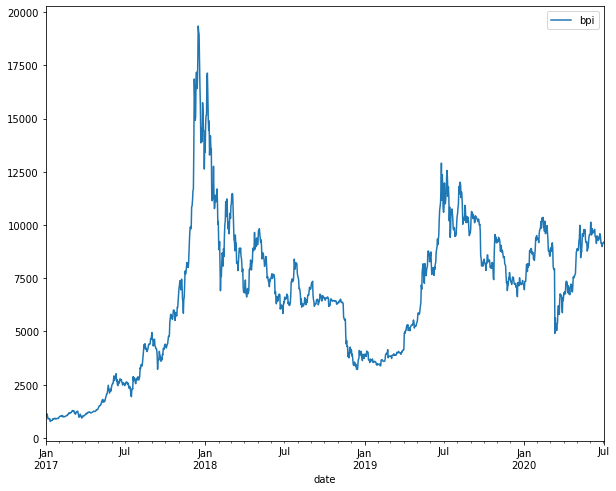

In [5]:
data.plot()

In [6]:
#resample : this function resamples the the data accordingly
data.resample('Q').mean() #Q for Qyarter

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


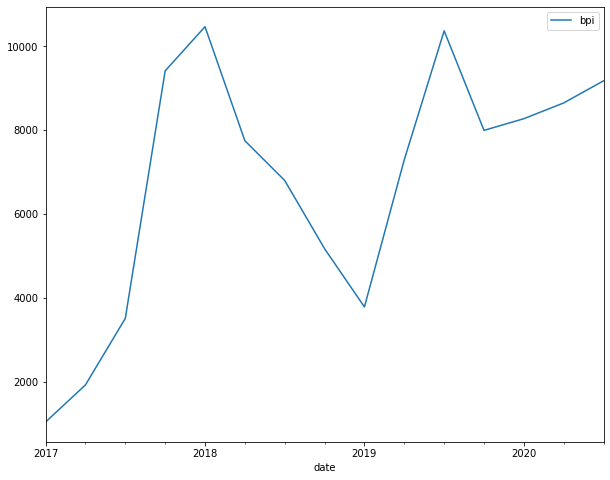

In [7]:
data.resample('Q').mean().plot()

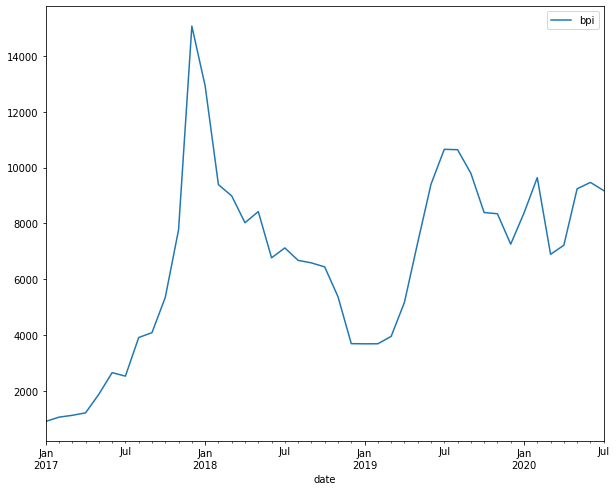

In [8]:
data.resample('M').mean().plot()

D for Calender Day B for Business Day W Weekly M Monthly Q Quarterly A Year end H for Hours T for Minutes S for secinds

This will help to chek for some pattern

In [9]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [10]:
data[:5].diff() #making the first value of column 1 NAN, this will be handy while we want to calculate lag

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [11]:
data[:5].diff(2) #leaving the two values as NAN

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


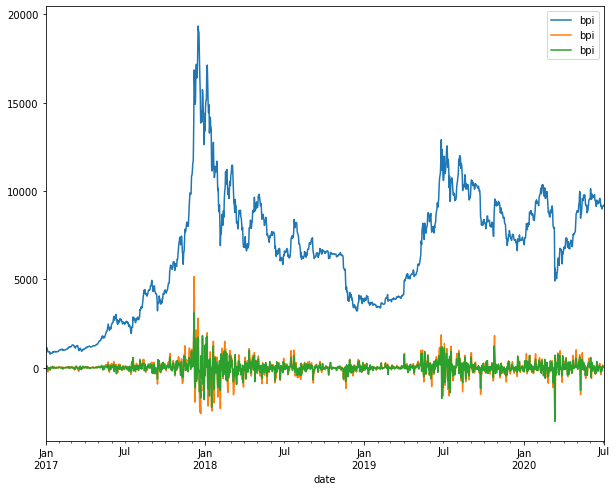

In [12]:
pd.concat([data['bpi'],data['bpi'].diff(2),data['bpi'].diff()],axis=1).plot()

In [13]:
data[:5] #t data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [14]:
data[:5].shift(2) #t-1 data

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175


In [15]:
data[:5].tshift(2) #It shifts the time by two months, practical use case is corona virus time can be shifted and overlayed with the previos year

,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [16]:
data[:5]-data[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


In [17]:
data[:5]-data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


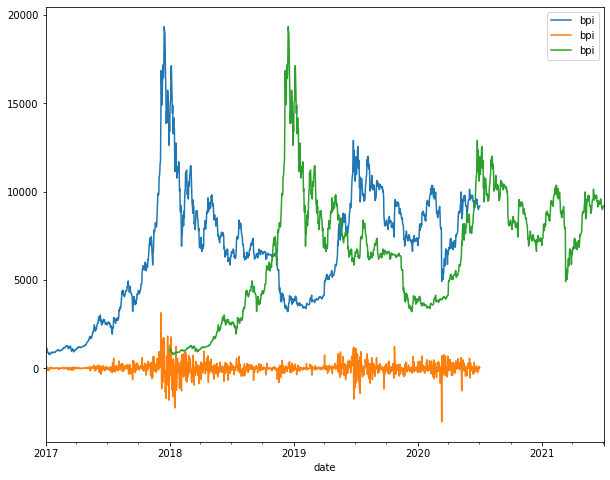

In [18]:
pd.concat([data,data-data.shift(), data.tshift(365)],axis=1).plot()

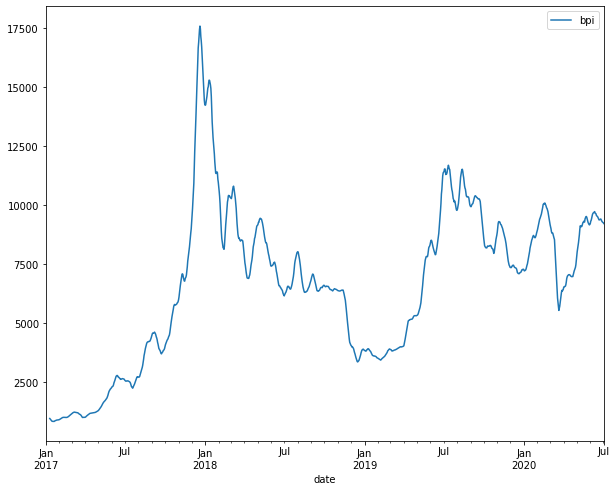

In [19]:
data.rolling(window=10).mean().plot()

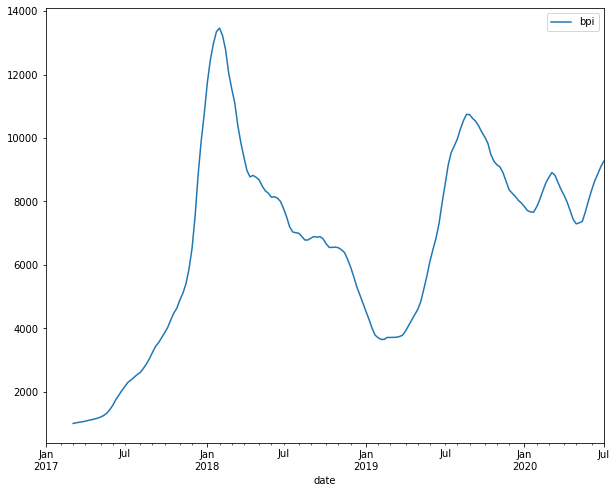

In [20]:
data.resample('W').mean().rolling(window = 10).mean().plot() #rolling window is used to calculate the averages

In [21]:

data.resample('W').mean().rolling(window = 10).mean().head(10)

,bpi
date,
2017-01-01,NaN
2017-01-08,NaN
2017-01-15,NaN
2017-01-22,NaN
2017-01-29,NaN
2017-02-05,NaN
2017-02-12,NaN
2017-02-19,NaN
2017-02-26,NaN


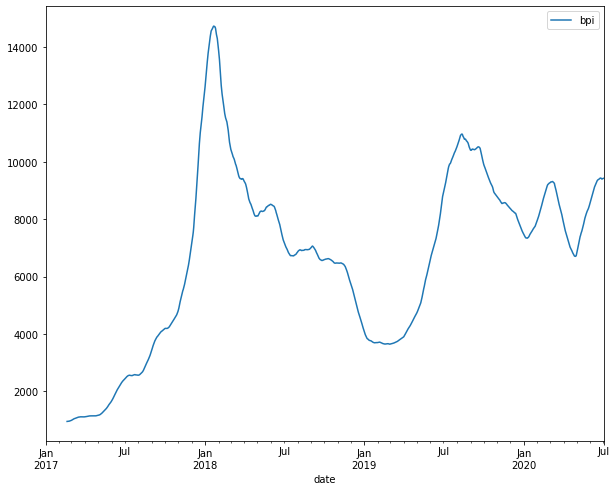

In [22]:

data.rolling(window=50).mean().plot() #rolling window function calculates SMA

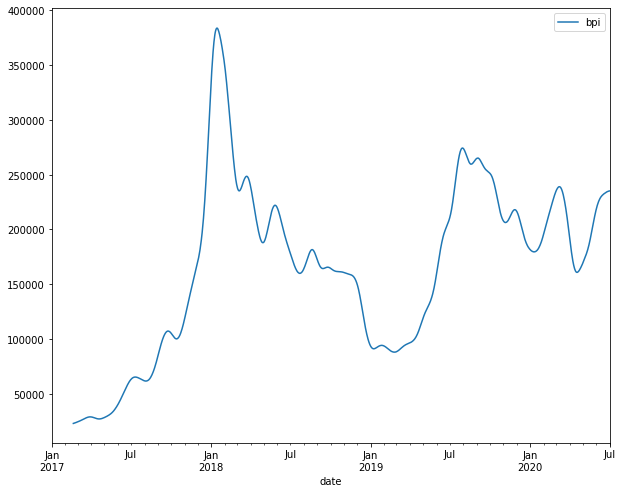

In [23]:
data.rolling(window=50,win_type='gaussian').sum(std =10).plot() #if we add window type gaussian with std dev of 10 the it is adding somw weights to the data

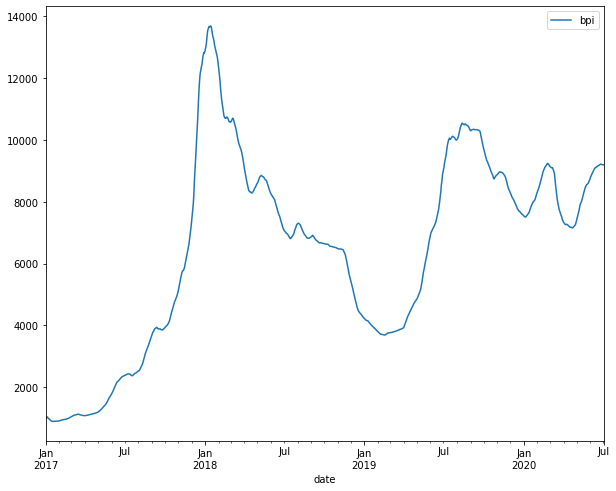

In [24]:
data.ewm(span=50).mean().plot() #ewm is exponential moving average, the main purpose of ewm we give more weightage to recent values rather than historical values

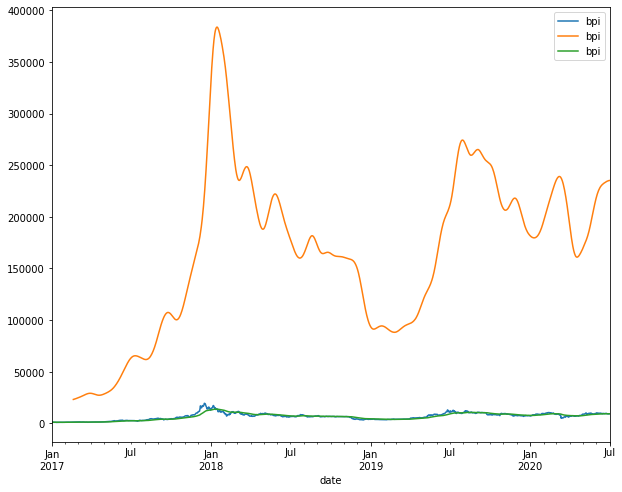

In [25]:
pd.concat([data,data.rolling(window=50,win_type='gaussian').sum(std =10),data.ewm(span=50).mean()],axis=1).plot()

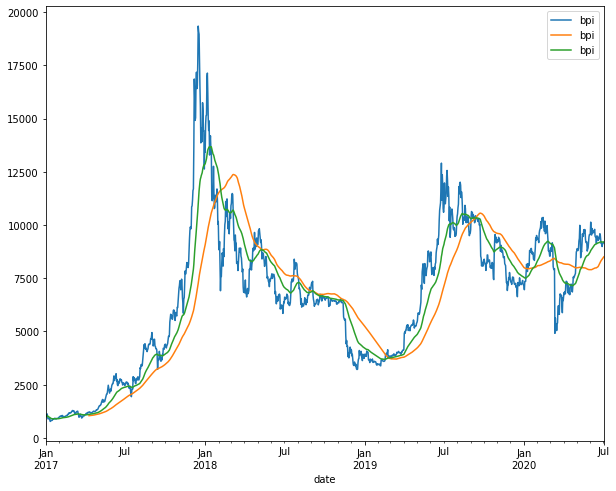

In [26]:

rolling_window_100=data.rolling(window=100).mean()
ewm_50 =data.ewm(span=50).mean()
pd.concat([data,rolling_window_100,ewm_50],axis=1).plot()

we need group by because of scenario
For to check weekend sale.
To compare different month sales

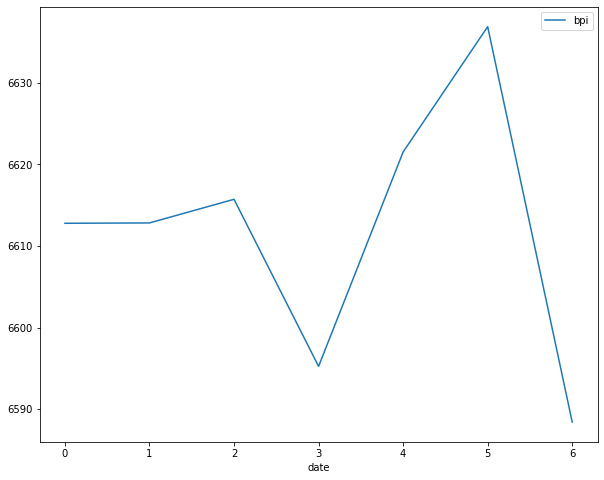

In [27]:
data.groupby(data.index.dayofweek).mean().plot()

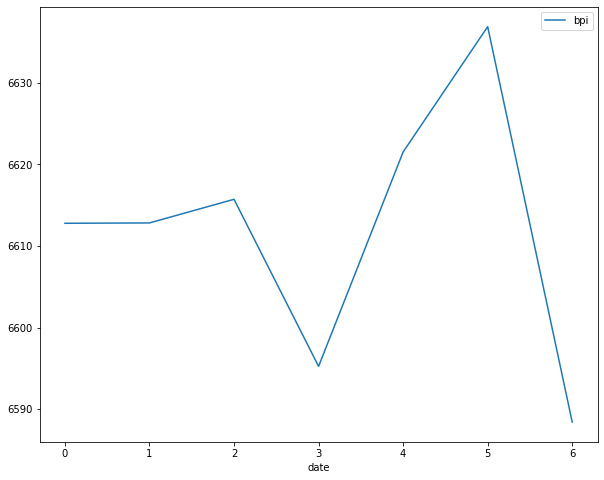

In [28]:
data.groupby(data.index.dayofweek).mean().plot()

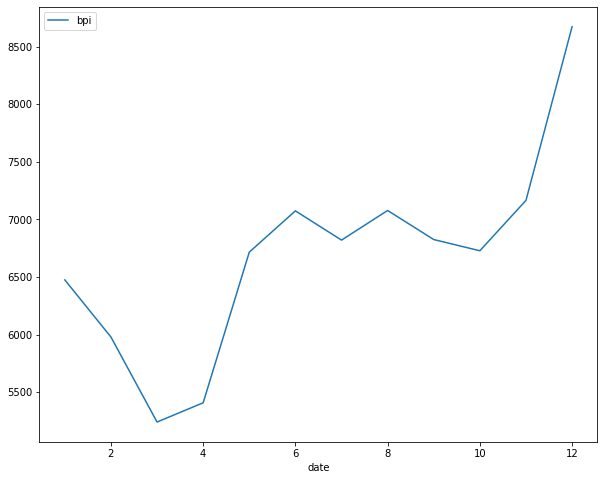

In [29]:
data.groupby(data.index.month).mean().plot()

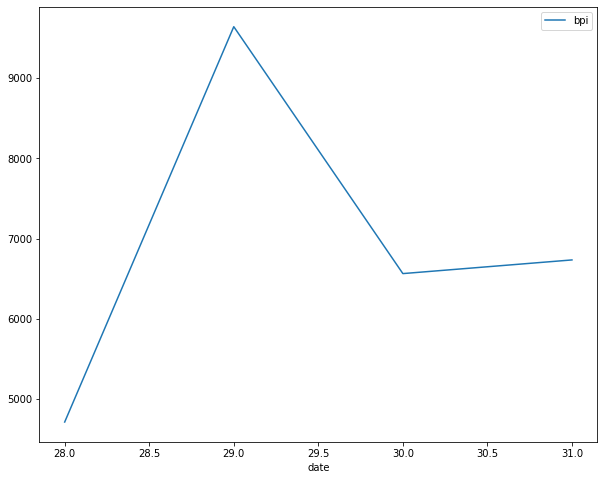

In [30]:
data.groupby(data.index.days_in_month).mean().plot()

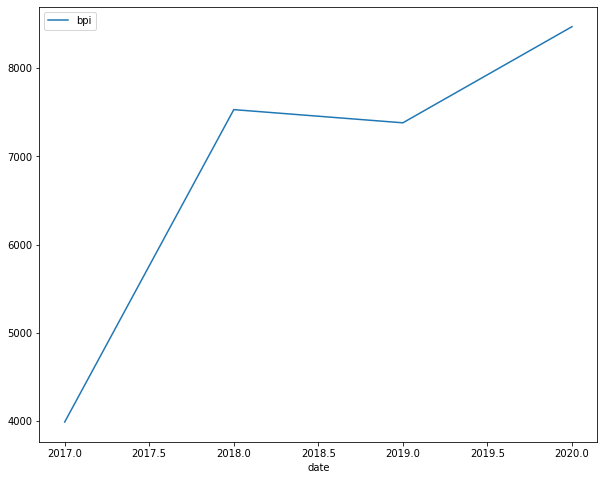

In [31]:
data.groupby(data.index.year).mean().plot()

In [32]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [33]:
data[:5].cumsum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


percentage change 2 is for t-2 chanegs , means it will check the how much the price has changes from previous t-2 datapoint.

In [34]:

data[:5].pct_change(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,0.033205
2017-01-04,0.109837
2017-01-05,-0.024255


In [35]:
data[:5].expanding().sum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


In [36]:

data[:5].expanding().mean()

,bpi
date,
2017-01-01,997.688800
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260


In [37]:

data[:5].expanding(2).mean()

,bpi
date,
2017-01-01,NaN
2017-01-02,1007.869400
2017-01-03,1015.518767
2017-01-04,1044.106575
2017-01-05,1036.448260
